In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
def create_frequency_table(data):
    """
    This function takes a list of data points and returns a frequency table as a Pandas DataFrame.
    """
    # Convert the list to a Pandas Series for convenience
    data_series = pd.Series(data)

    # Calculate frequency
    frequency = data_series.value_counts().sort_index()

    # Convert to DataFrame for better formatting and readability
    frequency_table = frequency.reset_index()
    frequency_table.columns = ['Value', 'Frequency']

    return frequency_table

In [3]:
def plot_bar_chart(frequency_table):
    """
    This function takes a frequency table and plots a bar chart.
    """
    # Plotting
    plt.bar(frequency_table['Value'], frequency_table['Frequency'])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Bar Chart of Frequencies')
    plt.show()

In [4]:
def plot_histogram(data, bins):
    """
    This function plots a histogram for continuous data.
    """
    # Plotting
    plt.hist(data, bins=bins, edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Data')
    plt.show()

## Create Data

In [5]:
# Example Data
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
freq_table = create_frequency_table(data)

## Display Frequency Table

In [6]:
# Display Frequency Table
print("Frequency Table:")
print(freq_table)

Frequency Table:
   Value  Frequency
0      1          1
1      2          2
2      3          3
3      4          4


## Plot Bar Chart

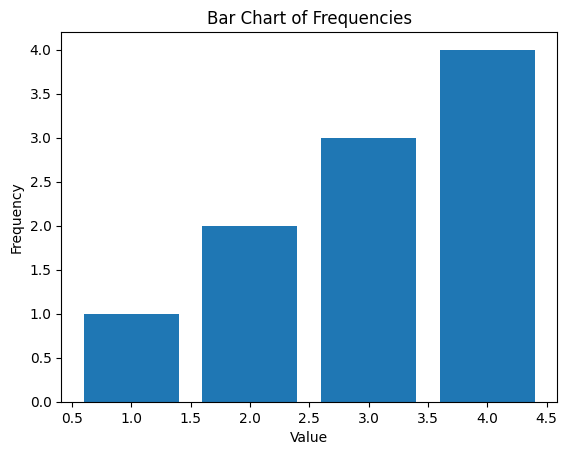

In [7]:
# Plot Bar Chart
plot_bar_chart(freq_table)

## Plot Histogram With Continuous Data

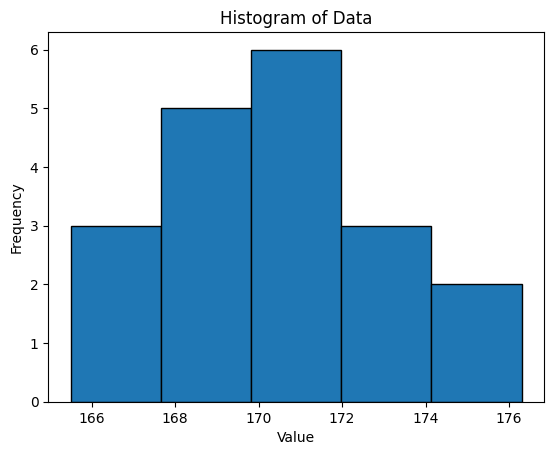

In [8]:
# For Histogram Example: Continuous Data
heights = [170.2, 165.5, 172.3, 168.7, 171.6, 167.4, 169.5, 171.2, 174.2, 166.1, 173.5, 169.9, 170.7, 167.8, 172.0, 176.3, 168.3, 170.9, 169.0]

# Plot Histogram for Height Data
plot_histogram(heights, bins=5)

In [9]:
def calculate_averages(data, weights):
    """
    Calculates various types of averages for the given data.
    """
    averages = {
        'arithmetic_mean': np.mean(data),
        'weighted_mean': np.average(data, weights=weights),
        'geometric_mean': stats.gmean(data),
        'median': np.median(data),
        'mode': stats.mode(data)[0]
    }
    return averages

In [10]:
def plot_averages(data, averages):
    """
    Plots the data points and marks various types of averages.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data, np.zeros_like(data), 'o', label='Data Points')

    # Plotting each type of average
    for mean_type, value in averages.items():
        plt.axvline(value, label=f'{mean_type.capitalize()}: {value:.2f}')

    # Adding annotations
    for mean_type, value in averages.items():
        plt.text(value, 0.02, mean_type.capitalize(), rotation=90)

    plt.ylim(-0.05, 0.05)
    plt.xlabel('Values')
    plt.yticks([])
    plt.title('Visualization of Different Types of Averages')
    plt.legend()
    plt.show()

## Display The Averages

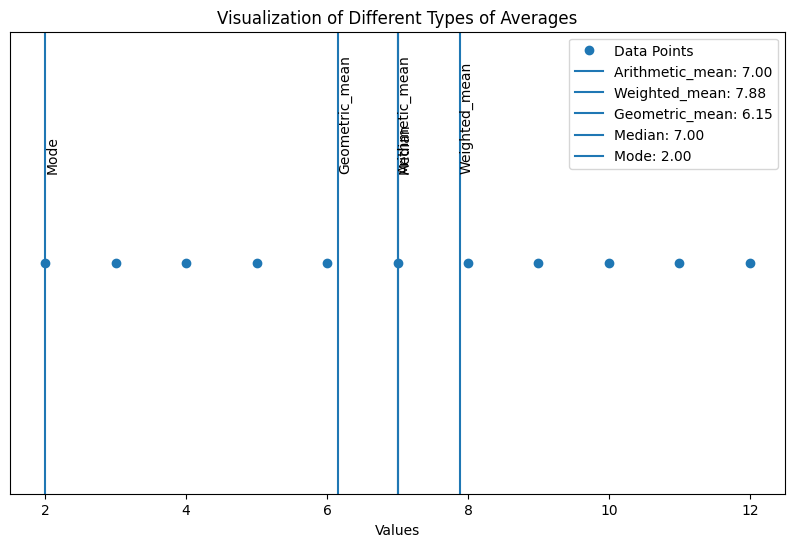

In [11]:
data = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
weights = np.array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])  # arbitrary weights
averages = calculate_averages(data, weights)
plot_averages(data, averages)

In [12]:
def calculate_variance_and_std_dev(data):
    """
    Calculates the variance and standard deviation of the given data.
    """
    variance = np.var(data)
    std_dev = np.sqrt(variance)
    return variance, std_dev

In [13]:
def plot_data_with_statistics(data, arithmetic_mean, std_dev):
    """
    Plots the data points, mean, and standard deviation range on a graph.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data, np.zeros_like(data), 'o', label='Data Points')
    plt.axvline(arithmetic_mean, color='r', linestyle='--', label=f'Mean: {arithmetic_mean:.2f}')
    plt.axvspan(arithmetic_mean - std_dev, arithmetic_mean + std_dev, alpha=0.3, color='yellow', label=f'Std Dev Range: {std_dev:.2f}')

    plt.text(arithmetic_mean, 0.02, 'Mean', rotation=90, color='r')
    plt.text(arithmetic_mean - std_dev, 0.02, '-1 Std Dev', rotation=90, verticalalignment='bottom')
    plt.text(arithmetic_mean + std_dev, 0.02, '+1 Std Dev', rotation=90, verticalalignment='bottom')

    plt.ylim(-0.05, 0.05)
    plt.xlabel('Values')
    plt.yticks([])
    plt.title('Visualization of Variance and Standard Deviation')
    plt.legend()
    plt.show()

## Display Standard Deviation

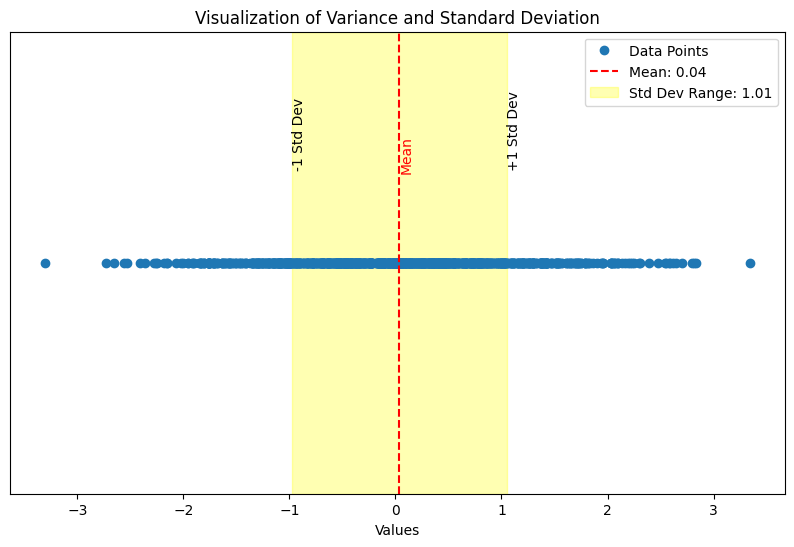

In [14]:
data = np.random.normal(0, 1, 1000)  # Example data
arithmetic_mean = np.mean(data)
variance, std_dev = calculate_variance_and_std_dev(data)
plot_data_with_statistics(data, arithmetic_mean, std_dev)

In [15]:
def plot_data_boxplots(datasets, titles, figsize=(10, 8)):
    """
    Plots a series of boxplots for given datasets.
    """
    fig, axs = plt.subplots(len(datasets), 1, figsize=figsize)

    for idx, data in enumerate(datasets):
        axs[idx].boxplot(data, vert=False)
        axs[idx].set_title(titles[idx])

    plt.tight_layout()
    plt.show()

## Define datasets

In [16]:
# Define datasets
data1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 100, 110, 120])  # Wide range in 4th quartile
data2 = np.array([1, 2, 50, 60, 70, 80, 90, 100, 101, 102]) # Wide interquartile range
data3 = np.array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59])  # Narrow interquartile range
data4 = np.array([1, 1, 2, 2, 3, 3, 4, 4, 50, 100])         # Data with outliers

## Plot the boxplots

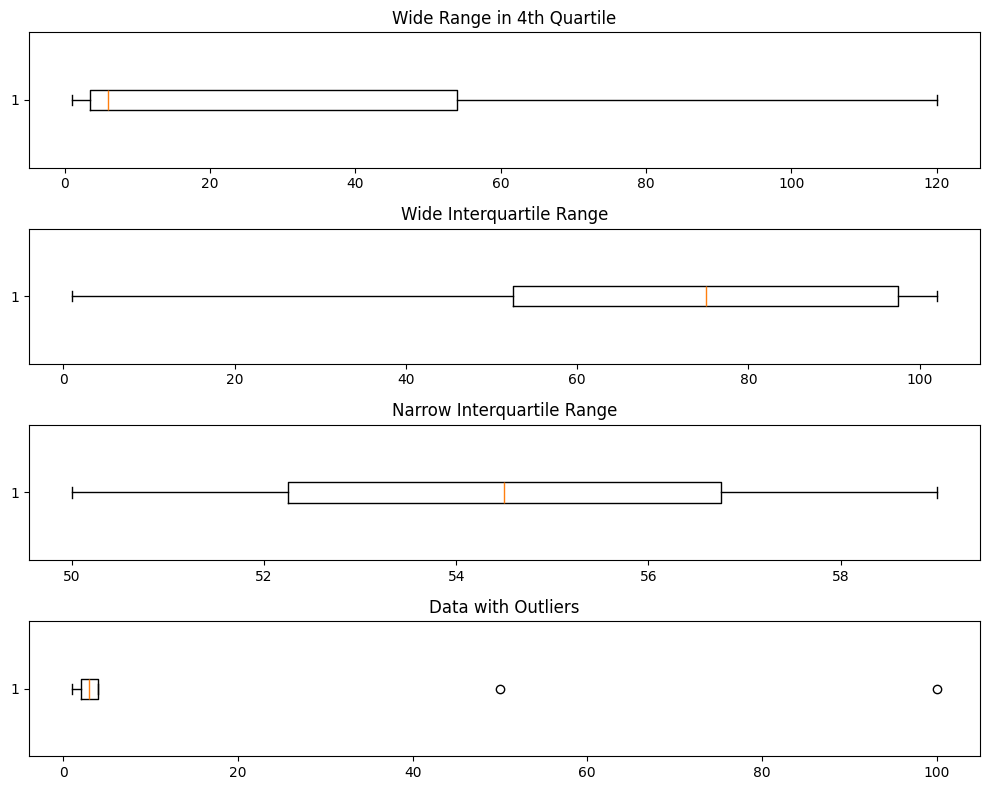

In [17]:
# Titles for each dataset
titles = [
    'Wide Range in 4th Quartile',
    'Wide Interquartile Range',
    'Narrow Interquartile Range',
    'Data with Outliers'
]

# Plot the boxplots
plot_data_boxplots([data1, data2, data3, data4], titles)